

# Compare the different ICA algorithms in MNE

Different ICA algorithms are fit to raw MEG data, and the corresponding maps
are displayed.


In [1]:
# Authors: Pierre Ablin <pierreablin@gmail.com>
#
# License: BSD-3-Clause

In [2]:
from time import time

import mne
from mne.preprocessing import ICA
from mne.datasets import sample


print(__doc__)

Automatically created module for IPython interactive environment


Read and preprocess the data. Preprocessing consists of:

- MEG channel selection
- 1-30 Hz band-pass filter



In [3]:
data_path = sample.data_path()
meg_path = data_path / "MEG" / "sample"
raw_fname = meg_path / "sample_audvis_filt-0-40_raw.fif"

raw = mne.io.read_raw_fif(raw_fname).crop(0, 60).pick("meg").load_data()

reject = dict(mag=5e-12, grad=4000e-13)
raw.filter(1, 30, fir_design="firwin")

Opening raw data file C:\Users\Haoze He\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Removing projector <Projection | Average EEG reference, active : False, n_channels : 60>
Reading 0 ... 9009  =      0.000 ...    59.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    0.0s finished


<Raw | sample_audvis_filt-0-40_raw.fif, 306 x 9010 (60.0 s), ~24.2 MB, data loaded>

Define a function that runs ICA on the raw MEG data and plots the components



In [4]:
def run_ica(method, fit_params=None):
    ica = ICA(
        n_components=20,
        method=method,
        fit_params=fit_params,
        max_iter="auto",
        random_state=0,
    )
    t0 = time()
    ica.fit(raw, reject=reject)
    fit_time = time() - t0
    title = "ICA decomposition using %s (took %.1fs)" % (method, fit_time)
    ica.plot_components(title=title)

FastICA



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.6s.


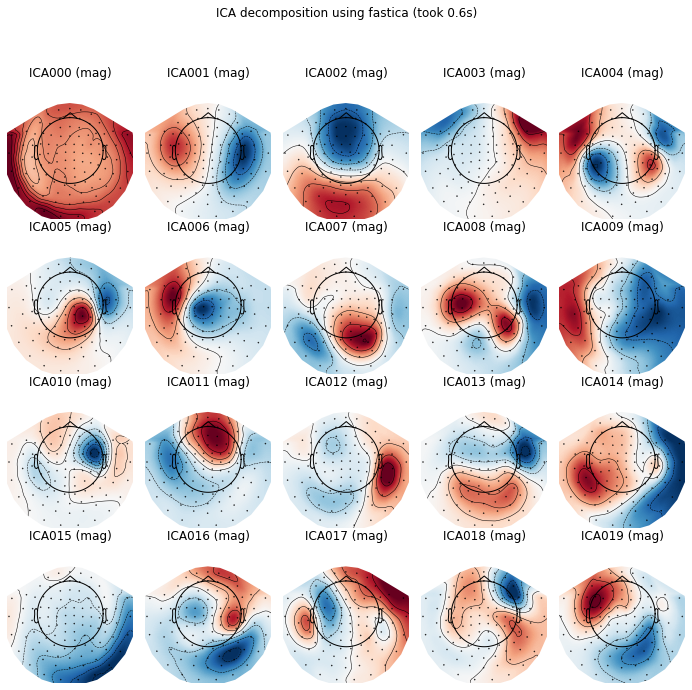

In [5]:
run_ica("fastica")

Picard



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.1s.


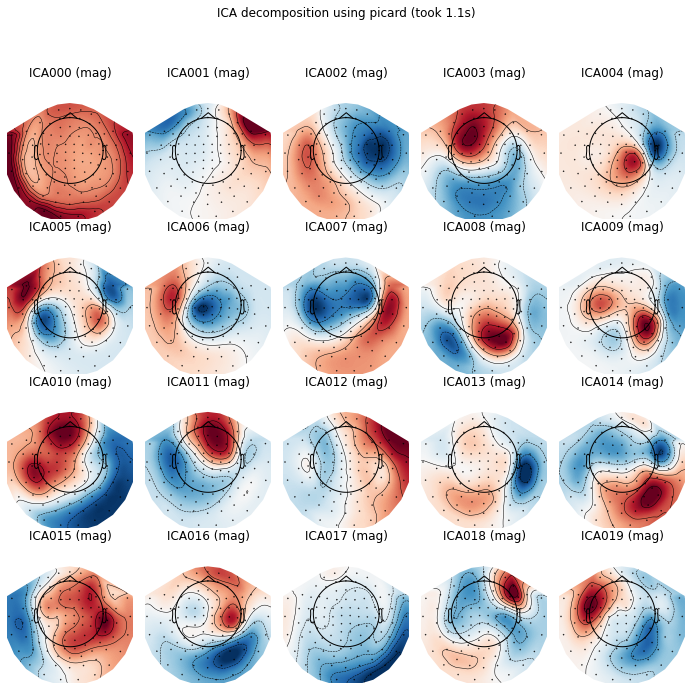

In [6]:
run_ica("picard")

Infomax



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
 
Fitting ICA took 1.4s.


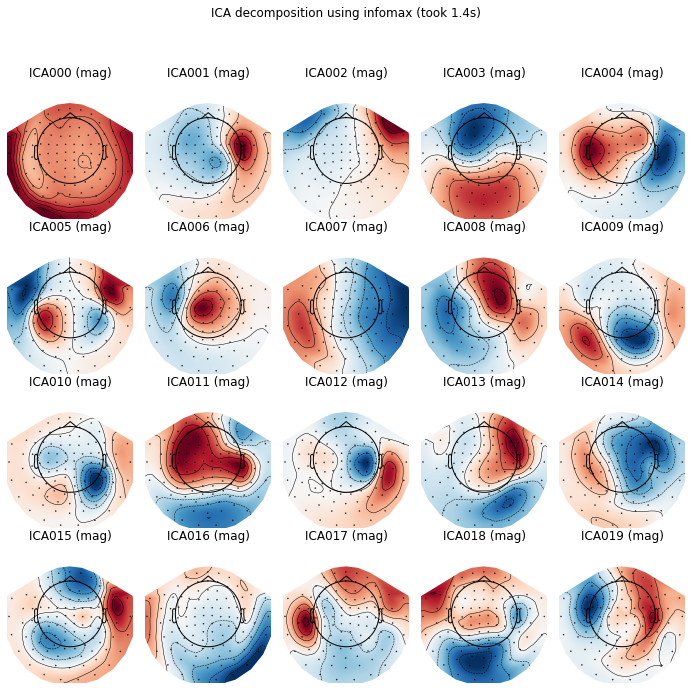

In [7]:
run_ica("infomax")

Extended Infomax



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Extended Infomax ICA
Fitting ICA took 2.3s.


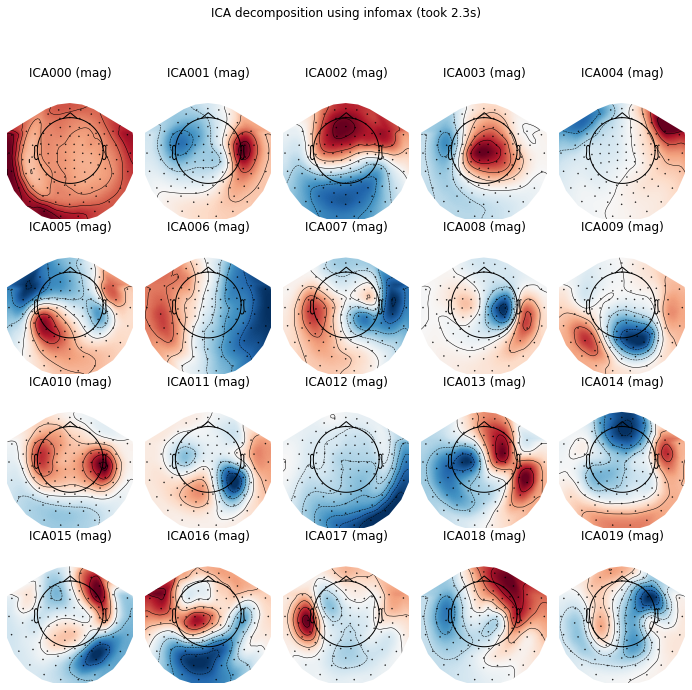

In [8]:
run_ica("infomax", fit_params=dict(extended=True))